# A TITANIC EFFORT: MY First Machine Learning Project  
_JupyterNotebook prepared by : Thatayotlhe Dinona_  

## Overview of the Titanic Dataset
This is an analysis of a Seaborn built-in Titanic dataset that is popular for learning machine algorithims for beginners.The Titanic dataset is a classic machine learning dataset that has been used extensively to introduce beginners to data science and machine learning concepts. It provides a real-world scenario where you can apply various machine learning algorithms to predict passender survival based on features like age,class,and fare  

### OBJECTIVE  
The primary goal of this analysis is to build a model that accurately predicts whether a passenger survived the Titanic disaster based on the forementioned features



In [323]:
# import the necessary libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

##### SEARCH FOR THE DATASET USING SEABORN get_dataset_name function

In [324]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

##### LOADING THE DATASET

In [359]:
df =sns.load_dataset( 'titanic')
df.head() # Tto display the first five rows

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


##### EXPLORATORY ANALYSIS (EDA)

In [326]:
df.info() # to inspect the dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [327]:
df.isna().sum() # check for null values , it is important to deal with the null values if we are going to feed our data to machine learning

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<Axes: >

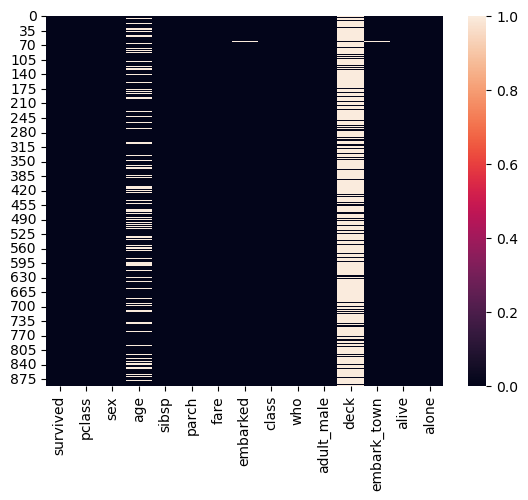

In [328]:
sns.heatmap(df.isna()) # to visualize the null values on a heatmap to get sense of their magnitude

In [329]:
df['age'].isna().sum()/len(df['age']) * 100 # percentage of null values for column age

19.865319865319865

In [330]:
df['deck'].isna().sum()/len(df['deck']) * 100 # percentage of null values for column deck

77.21661054994388

In [331]:
df.describe() # The describe function displays a descriptive statistics of our numerical values, a quick way to internalize the data

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


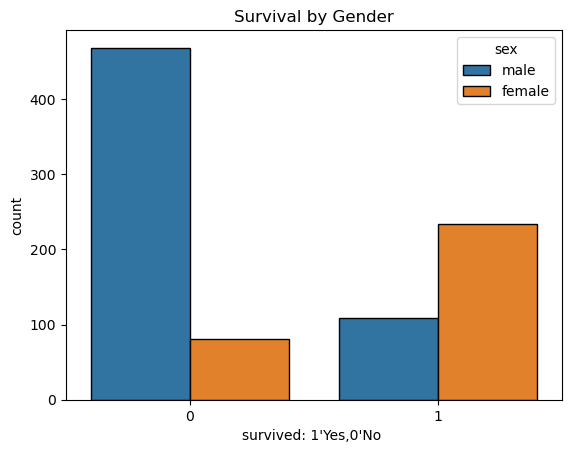

In [332]:
sns.countplot(x='survived',data=df,hue='sex',edgecolor='black') # count plot of passenger survival by sex
plt.xlabel("survived: 1'Yes,0'No ")
plt.title('Survival by Gender')
plt.show()

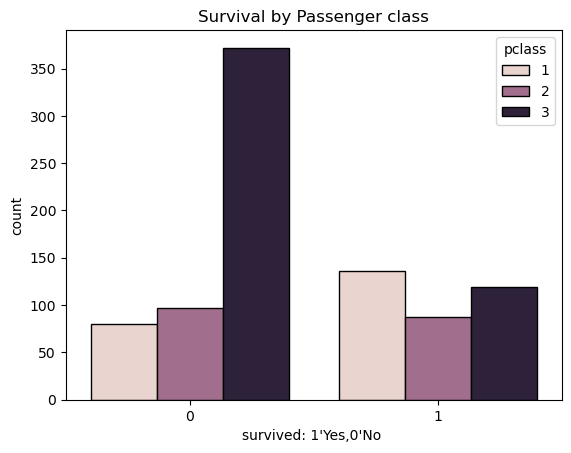

In [333]:
sns.countplot(x='survived',data=df,hue='pclass',edgecolor='black') # count plot of passenger survival by pclass(passenger classs)
plt.xlabel("survived: 1'Yes,0'No ")
plt.title('Survival by Passenger class')
plt.show()

In [334]:
corr = df.corr(numeric_only=True) # correlation between variables 
corr

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


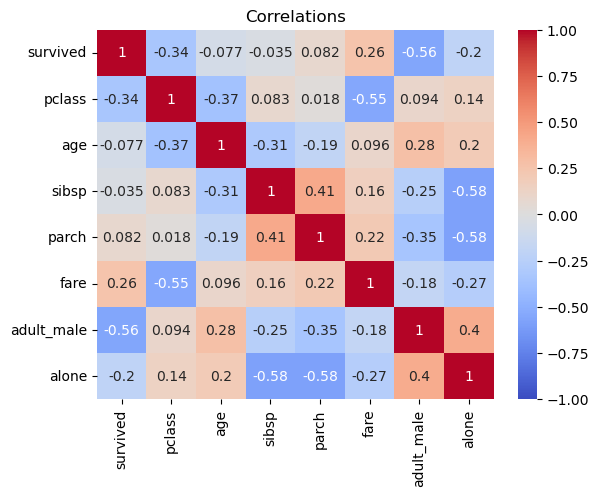

In [297]:
sns.heatmap(corr,annot=True,vmin=-1,vmax=1,cmap='coolwarm') # to visualize correlation between variables
plt.title('Correlations')
plt.show()

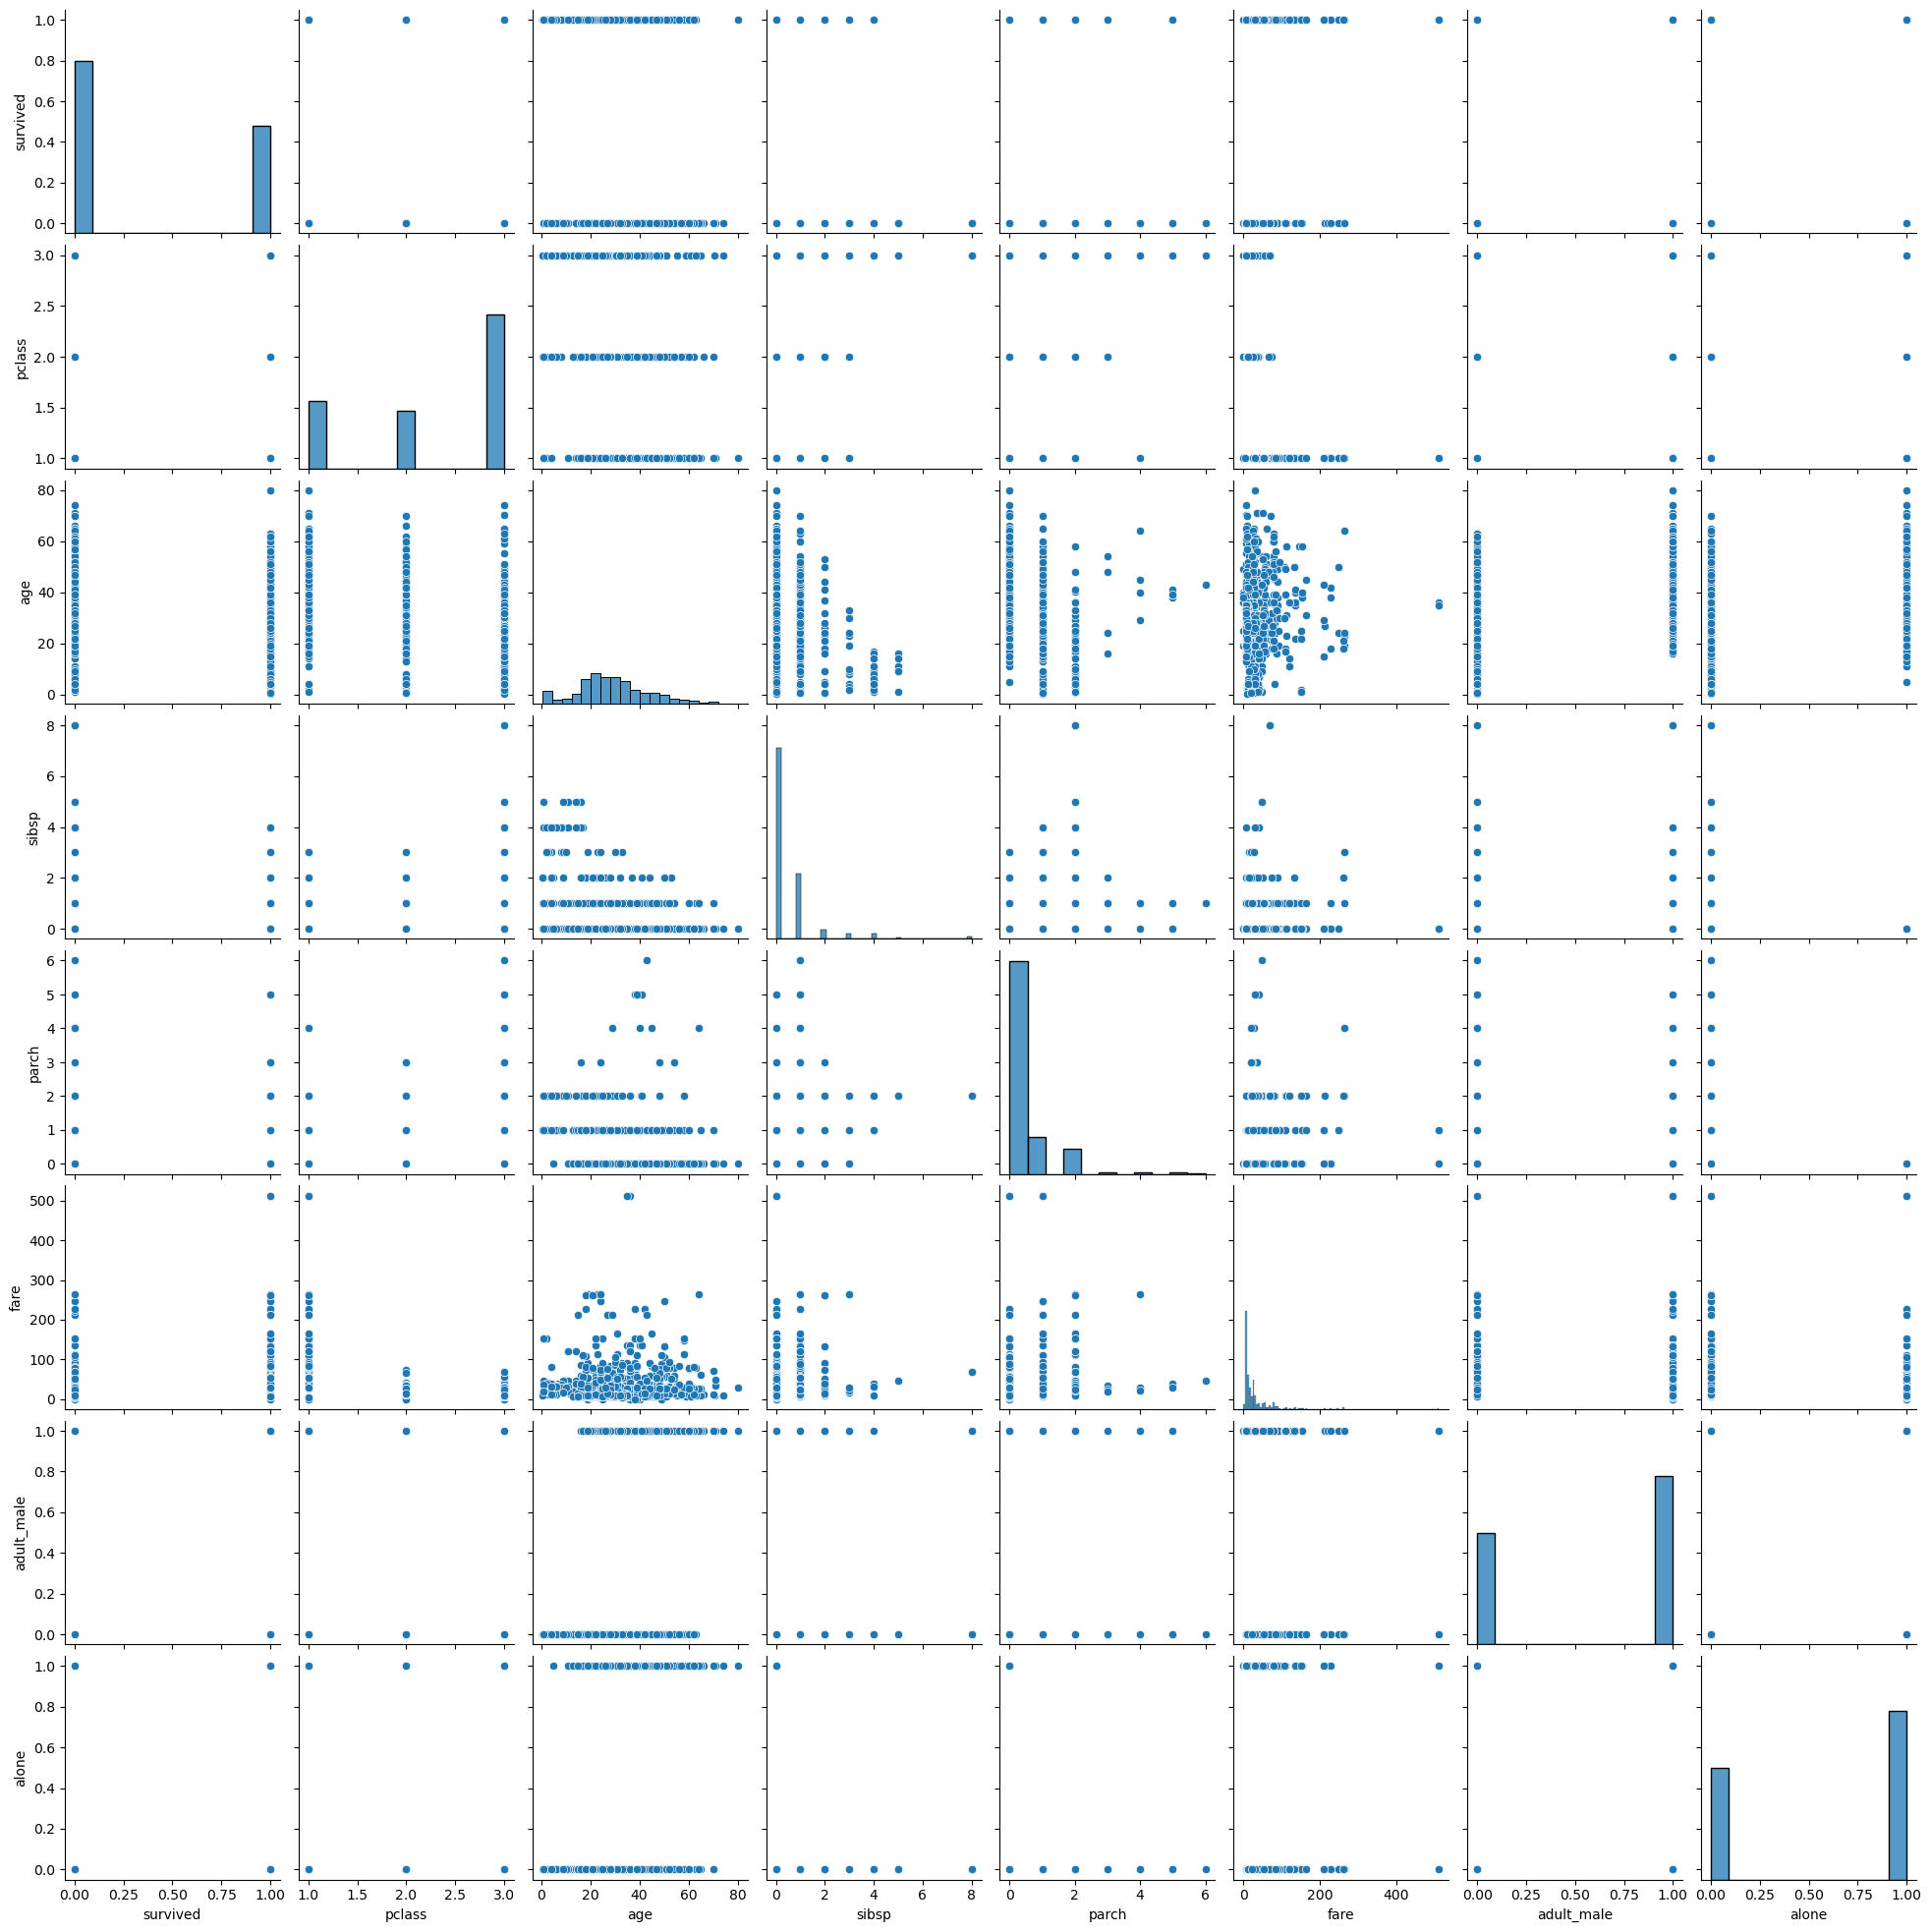

In [335]:
sns.pairplot(df) # visualize relationships between numerical variables
plt.show()

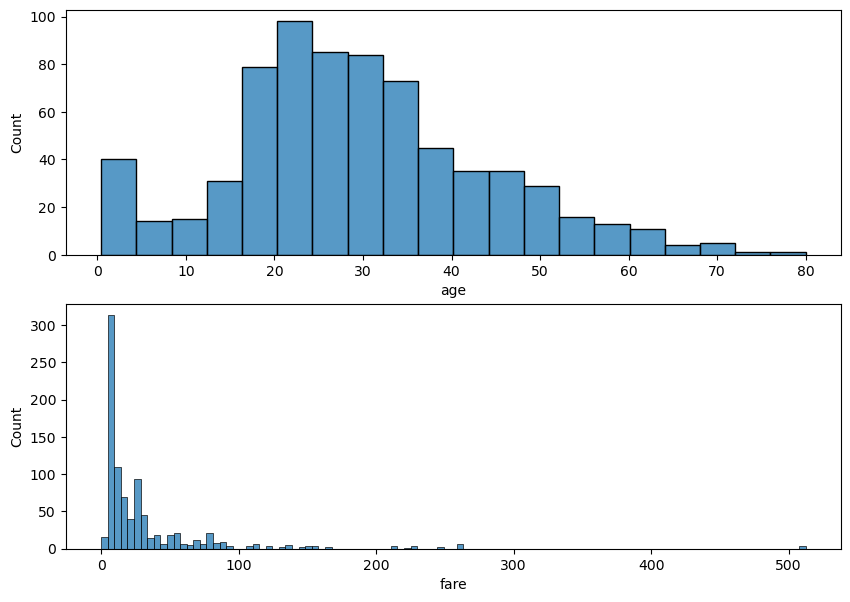

In [299]:
fig, axs = plt.subplots(2, 1, figsize=(10, 7))

sns.histplot(df['age'], ax=axs[0]) # Distribution of passenger ages

sns.histplot(df['fare'], ax=axs[1]) # Distribution of fare


plt.show()


In [337]:
df[['age','deck']].isnull().sum() # sum of null values for age and deck

age     177
deck    688
dtype: int64

In [338]:
df['age'].mean() # average passenger age

29.69911764705882

In [360]:
df['age'] = df['age'].fillna(df['age'].mean()) # since our percentage of null values for age was 19% it is easy to do mean imputation of the null values

In [361]:
df = df.drop(columns=['alone','embark_town','embarked','who','deck','adult_male','alive']) # Droping uncessary columns

In [362]:

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,class
0,0,3,male,22.0,1,0,7.2500,Third
1,1,1,female,38.0,1,0,71.2833,First
2,1,3,female,26.0,0,0,7.9250,Third
3,1,1,female,35.0,1,0,53.1000,First
4,0,3,male,35.0,0,0,8.0500,Third


### Preprocessing

In [363]:
from sklearn.preprocessing import LabelEncoder # since machine learning works with numeric value only, it is important to convert any categorical or ordinal value to binary
columns=['sex','class']

encoded=LabelEncoder()

for column in columns:
   df[column] = encoded.fit_transform(df[column])
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,class
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,2


In [364]:
df.dtypes # sex and class is now an int

survived      int64
pclass        int64
sex           int32
age         float64
sibsp         int64
parch         int64
fare        float64
class         int32
dtype: object

In [365]:
X = df.drop(columns=['survived']) # X is my independent varriables or predictors 
y= df['survived'] # y is my dependent varriable or target value

#### SPLITING THE DATA INTO TRAINNING AND TESTING SETS

In [366]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression # importing the model for the task

In [367]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42) # This line splits the data into training and testing sets 
                                                                                            # 33% of the data is for testing and 77% is for trainning

In [368]:
model=LogisticRegression() # initiaziling the LogisticRegression object

In [369]:
model.fit(X_train,y_train) # traninng the model by fitting it to the trainning data

LogisticRegression()

In [370]:
prediction = model.predict(X_test) # used trained model to make predictions on new and unseen data

In [371]:
prediction

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0], dtype=int64)

### Accuracy Score of my Machine Learning Model

In [372]:
from sklearn.metrics import accuracy_score  # To check accuracy of my machine learning model, i import the accuracy score from the sklearn library

accuracy = accuracy_score(y_test, prediction)
print("Accuracy Score:", accuracy)


Accuracy Score: 0.8169491525423729


##### The accuracy score of 81% signifies that 81 correct predictions were made by the model

### Confusion Matrix  
The confusion matric below shows the number of correct and incorrect predictions made by my model

 

In [373]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, prediction)
print("Confusion Matrix:\n",cm)


Confusion Matrix:
 [[156  19]
 [ 35  85]]


### Insights and Conclusion from the Titanic Dataset

* Women and children were prioritized during the evacuation process hence a higheer survival rate for females as compared to males
* effective data cleanig, handling missing values and features engineering are crucial for improving model performance .Techniques like one-hot enconding for categorical variables can significantly impact the model's accuracy
  

###  Conclusion

* Overall, the Titanic dataset provides a valuable opportunity to learn and pratice machine learning techniques.